This code computes various properties of an alkaline water electrolysis cell for hydrogen production. It includes models and plots for polarization curves, cell voltages, overvoltages, efficiencies, and hydrogen yield under different operating conditions such as temperature, current density, and pressure. Sections of the code may not not be chronologically presented, but referring to the accompanying article and other similar articles will help distinguish the different parts of the model.

In [ ]:
# ********reversible voltage at standard conditions *********

# values of energy of formation :entropy and enthalpy at standard conditions 
# 1. enthalpies at standard conditions
deltaH_H2O= -285.83 #kJ/mol
deltaH_H2= 0 #kJ/mol
deltaH_O2= 0 #kJ/mol
# 2. entropies at standard conditions 
deltaS_H2O= 69.942 #J/K 
deltaS_H2O_kJ= 69.942/1000 #KJ/K 

deltaS_H2= 130.68 #J/K
deltaS_H2_kJ= 130.68/1000 #KJ/K 

deltaS_O2= 205.81 #KJ/K
deltaS_O2_kJ= 205.81/1000 #KJ/K 
T=298.15 #K


**notes
∆G= ∑νprod*∆Hf,prod − ∑νrct*∆Hf,rct - T* [ ∑νprod*∆Sf,prod − ∑νrct*∆Sf,rct]
2H2O (l) → 2H2(g) + O2(g) 
H2O (l) → H2(g) + 0.5O2(g)  


In [3]:
deltaG_std= ((deltaH_H2*1)+(deltaH_O2*0.5)-(deltaH_H2O*1)) - (T*((deltaS_H2_kJ*1)+(deltaS_O2_kJ*0.5)-(deltaS_H2O_kJ*1)))
deltaG_std

237.03983954999998

**notes
Erev_std = ∆G_std/ zF

In [ ]:
# reversible voltage at standard conditions
z=2 #electrons transfered 
F=96485 #faraday constant C/mol
deltaG_std_J=deltaG_std*1000 # has be in joules since the unit of voltage is joules
Erev_std = deltaG_std_J/(z*F)
Erev_std 

1.2283766365238118

<!-- **notes -->
to find the reversible voltage at different temperature than starndard the following empirical equation is used . this accounts for temerature change only 
Erev(T,1) = 2 F ΔG(T) = 1.5184 − 1.5421 × 10^−3 ∗ T + 9.523 × 10^−5 ∗ T ∗ Ln(T) + 9.84 × 10−8 T^2

In [5]:
import math # module imported to use log 
T=80
T_K= T+273.15
Erev_T_1 = (1.5184-(1.5421*10**-3)*T_K)+(9.523*10**-5*T_K*math.log(T_K))+(9.84*10**-8*T_K**2)
Erev_T_1

1.1833857253022804

<!-- **note -->
Accounting for pressure , another empirical expression  is added to the one for temperature 
Erev(T, P)= E(T,1) +(3RT/4F)LnP

In [ ]:

R=8.3145 #J/Kmol
p=10 #atm

# Expression to account for pressure 
p_expression = ((3*R*T_K)/(4*F))*math.log(p)
# reversible voltage @ specific temperature and pressure 
Erev_T_p = Erev_T_1 + p_expression 
Erev_T_p

1.2359405387887687

<!-- **notes -->
Profil reversible voltage changes with temperature at different pressure 


[2.3077982076387054, 2.297676391944294, 2.2879171730324894, 2.2784870866166815, 2.269356771645832, 2.26050032634413, 2.251894784250748, 2.2435196845415164, 2.23535671709107, 2.227389427277443, 2.219602968910173, 2.211983896202165, 2.2045199876319015, 2.1972000960171743, 2.1900140202597727, 2.1829523951061565, 2.17600659596322, 2.169168656356137, 2.1624311960504308, 2.155787358208376, 2.1492307542295657, 2.1427554151516293, 2.136355748670944, 2.1300265009932926, 2.1237627228476272, 2.117559739097609, 2.1114131214696212, 2.105318663985713, 2.0992723607480874, 2.0932703857703907, 2.0873090745918, 2.0813849074441557, 2.0754944937712425, 2.0696345579235857, 2.0638019258726237, 2.05799351280536, 2.0522063114750857, 2.046437381195912, 2.040683837378906, 2.0349428415159623, 2.0292115915242093, 2.0234873123690793, 2.0177672468881522, 2.0120486467406806, 2.0063287634093676, 2.0006048391815163, 1.994874098036133, 1.9891337363619135, 1.9833809134282279, 1.9776127415271825]


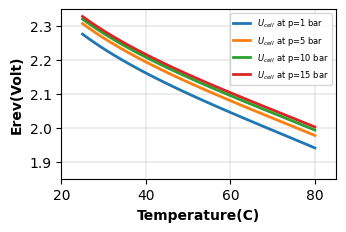

In [ ]:
import numpy as np # the module offers the ability to work with arrays or list
import matplotlib.pyplot as plt #  plotting module

T_list = np.linspace(25,80) # Array of temperatures
p_list = np.array([1,5,10,15])  # Array of pressures

# Compute the reversible voltage at varied pressure and temperature 

# 3D array for storage of reversible voltage at varied pressures and temperatures
Erev_multi=[]

# Function to compute the reversible volage 
def reversibleV (Temps=T_list,pressures=p_list):
 
  for pressure in pressures:
    Erev_temp=[] #array of reversible voltage at different temperatures 

    for temperature in Temps:
       
        T=temperature
        T_K= T+273.15
        # reversible voltage based on temperature 
        Erev_T_1 = (1.5184-(1.5421*10**-3)*T_K)+(9.523*10**-5*T_K*math.log(T_K))+(9.84*10**-8*T_K**2)

        R=8.3145
        F=96485
        # pressure expression 
        p_expression = ((3*R*T_K)/(4*F))*math.log(pressure)
        # overal reversible voltage
        Erev_T_p = Erev_T_1 + p_expression
        # Append Erev for each temperature 
        Erev_temp.append(Erev_T_p )
    # Append Erev for each pressure 
    Erev_multi.append(Erev_temp)  

reversibleV()

# print(Erev_multi[1])

# plotting  

Fig,ax=plt.subplots(figsize=(3.54331,2.2))

ax.set_xlabel('Temperature(C)',fontweight='bold',animated=True)
ax.set_ylabel('Erev(Volt)',fontweight='bold')

ax.set_xlim(20,85)
ax.set_ylim(1.85,2.35)

ax.grid(color='gray', linewidth=0.2, alpha=1)

# set a line foreach pressure 
i=0
for pr in p_list:
 
 ax.plot(T_list,Erev_multi[i],label=f'$U_{{cell}}$ at p={pr} bar',linewidth=2)
 i+=1
 ax.legend(loc="upper right",prop={'size':6})

#  Fig.savefig("PlotFigures/polarization_curve.tiff", format='tiff', dpi=500, bbox_inches='tight')



Modelling Thermoneutral voltage . minimum volatge required under adiabatic conditions. Emperical formula:
Vth (T,1) = ∆H/ zF = 1.485 − 1.49 × 10^−4 ∗ (T − T0) − 9.84 × 10^−8 ∗ (T − T0)^2
Vth (T, P) = [H (T, 1) + (B − (∂B )/(∂T )) P +(C – B^2  – 0.5 T [ ( ∂C)/∂T ∂T – 2 B  ∂B/(∂T )])/(R.T)  P2]/zF

In [ ]:
# Thermoneutral voltage at standard conditions using Gibbs free formula 
enthalpy=285.83 # kj/mol
f=96485 #c/mol
n=2
Vth_std=(enthalpy*1000)/(f*n) # in j/c or volt
Vth_std

1.4812146965849613

In [ ]:
# Thermoneutral voltage at standard conditions using empirical formula 
Tcelcius=25
Tinitial=25
T=Tcelcius+273.15
T0=Tinitial+273.15
# calculation of vth at varied temperature and 1 bar 
v_T_1= (1.485-(1.49*10**-4)*(T-T0))-(9.84*10**-8*(T-T0)**2)
v_T_1

1.485

[1.4854986534830579, 1.4855176252825109, 1.4855364887365563, 1.4855552438451958, 1.4855738906084281, 1.4855924290262532, 1.485610859098672, 1.4856291808256838, 1.4856473942072888, 1.4856654992434868, 1.4856834959342782, 1.4857013842796623, 1.48571916427964, 1.4857368359342102, 1.4857543992433744, 1.4857718542071314, 1.4857892008254814, 1.485806439098425, 1.4858235690259614, 1.4858405906080907, 1.4858575038448136, 1.4858743087361297, 1.4858910052820384, 1.4859075934825408, 1.4859240733376364, 1.4859404448473246, 1.4859567080116065, 1.4859728628304816, 1.4859889093039491, 1.4860048474320104, 1.486020677214665, 1.486036398651912, 1.4860520117437528, 1.4860675164901866, 1.4860829128912134, 1.4860982009468335, 1.4861133806570468, 1.4861284520218532, 1.486143415041253, 1.4861582697152453, 1.486173016043831, 1.48618765402701, 1.486202183664782, 1.4862166049571477, 1.4862309179041062, 1.4862451225056574, 1.4862592187618024, 1.4862732066725406, 1.4862870862378712, 1.4863008574577958]


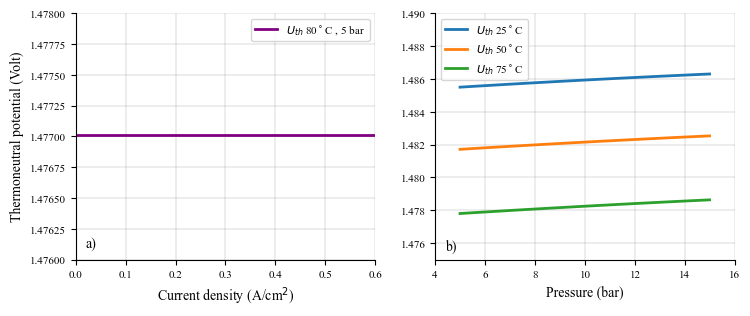

In [ ]:
# Thermoneutal voltage at various temperature and pressure

# Empirical coefficients parameters
c1=-351
c2=12760
C= c1 + (c2/T**1/2)
b1=20.5
b2=-1857
B=b1+(b2/T)
dB_dT=b2/T**2
c2=12760
dC_dT= c2/T**3/2

#  Pressure and gas constants
p=1  # Standard pressure
Rpg=8.3145 # Gas constant (J/mol·K)
F=96485 # Faraday's constant (C/mol)

p_list= np.linspace(5,15) # Pressure range (bar)
T_list=np.array([25,50,75])  # Temperature range (°C)


# 3d List to store thermoneutral potentials at different temperatures and pressures 
uth_multi = []

# Function for thermoneutral voltage at varied temperature and pressure
def Uth (temperatures=T_list,pressures=p_list):

    for temperature in temperatures:
        Uth_list=[] # Uth at different pressures 
        for p in pressures:
          
            Tinitial=25 # Reference temperature in °C
            T=temperature+273.15 # Convert T to Kelvin
            T0=Tinitial+273.15 # Reference temperature in Kelvin
            # calculation of vth at varied temperature and 1 bar 
            v_T_1= (1.485-(1.49*10**-4)*(T-T0))-(9.84*10**-8*(T-T0)**2)
            # Accounting for pressure
            H_T_P =(v_T_1*2*F)+ (B-(T*dB_dT))*(p)+ ((C-B**2)-(0.5*T*(dC_dT-(2*B*dB_dT))))*(p**2)/(Rpg*T)

            v_T_p=H_T_P /(2*F)
            # Append 2d list based at different pressure 
            Uth_list.append(v_T_p)
        
        # Appemd 3d list at different pressure and temperature 
        uth_multi.append(Uth_list)

Uth()
# print(uth_multi[0])


# for  uth at constant temperature and pressure


A_m2=0.1  # Electrode area (m²)
I_list= np.linspace(0,600,100) # Current range (A)
i_list = I_list/A_m2 #current density
i_list_cm2 =  i_list/10000 # current density in A/cm^2

# Model change in Uth with current density at constant pressure and temperature 
Uth_list_i = [] # List for uth change 
# No need for looping as uth is independent of cirrent dernsity
def Uthi ():
    for i in i_list:
            temperature=80
            p=5
            i=4000
            Tinitial=25
            T=temperature+273.15
            T0=Tinitial+273.15
            # calculation of vth at varied temperature and 1 bar 
            v_T_1= (1.485-(1.49*10**-4)*(T-T0))-(9.84*10**-8*(T-T0)**2)
           
            H_T_P =(v_T_1*2*F)+ (B-(T*dB_dT))*(p)+ ((C-B**2)-(0.5*T*(dC_dT-(2*B*dB_dT))))*(p**2)/(Rpg*T)

            v_T_p=H_T_P /(2*F)

            Uth_list_i.append(v_T_p)
Uthi()


plt.rcParams["font.family"] = "Times New Roman "

# Plotting  Results 

# Generating image
Fig1, (ax1, ax2) =plt.subplots(nrows=1, ncols=2,figsize=(8.50, 3.2 ) )
Fig1.subplots_adjust(wspace=0.2) 

# plot 1: Thermoneutral voltage vs. Current density
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.text(0.02, 1.4761, 'a)',fontsize=10,)
ax1.set_xlabel('Current density (A/cm$^{2}$)',animated=True, fontsize=10)
ax1.set_ylabel('Thermoneutral potential (Volt)', fontsize=10)
ax1.grid(color='gray', linewidth=0.2, alpha=1)
ax1.set_xlim(0,0.6)
ax1.set_ylim(1.4760,1.478)
ax1.tick_params(axis='both', labelsize=8)  # Adjust size for x and y axis

ax1.plot(i_list_cm2, Uth_list_i,label=f'$U_{{th}}$ {80}$^\circ$C , 5 bar',color='purple',linewidth=2)
ax1.legend(loc="upper right",prop={'size':8})

# plot 2 : Thermoneutral voltage vs. Pressure
ax2.text(4.4, 1.4756, 'b)',fontsize=10,)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlabel('Pressure (bar)',animated=True, fontsize=10)
ax2.set_ylabel('', fontsize=8)
ax2.grid(color='gray', linewidth=0.2, alpha=1)
ax2.tick_params(axis='both', labelsize=8)  
ax2.set_xlim(4,16)
ax2.set_ylim(1.475,1.49)
#  Plotting for each temperature
i=0
for tp in T_list:
 
 ax2.plot(p_list, uth_multi[i],label=f'$U_{{th}}$ {tp}$^\circ$C',linewidth=2)
 i+=1
 ax2.legend(loc="upper left",prop={'size':8})
# Save Figure
# Fig1.savefig("images/thermoneutral-pot3.tiff", format='tiff', dpi=500, bbox_inches='tight',bbox_extra_artists=[ax1.yaxis.label, ax2.yaxis.label],pil_kwargs={"compression": "tiff_lzw"})


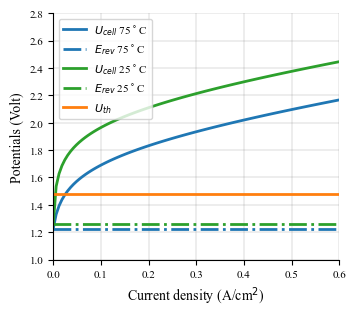

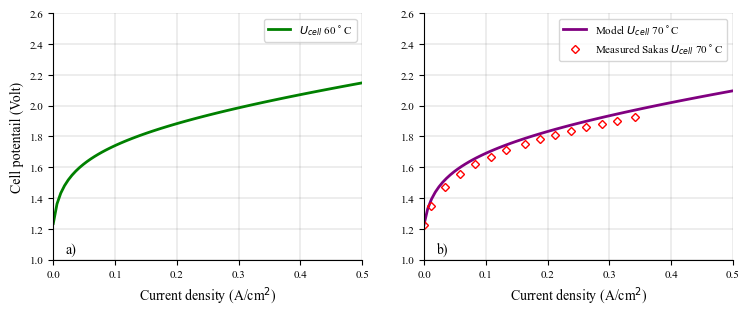

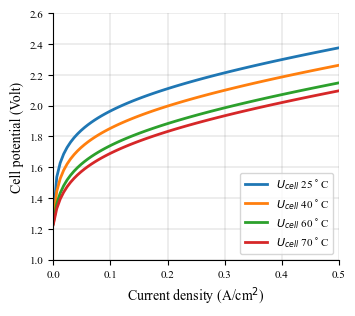

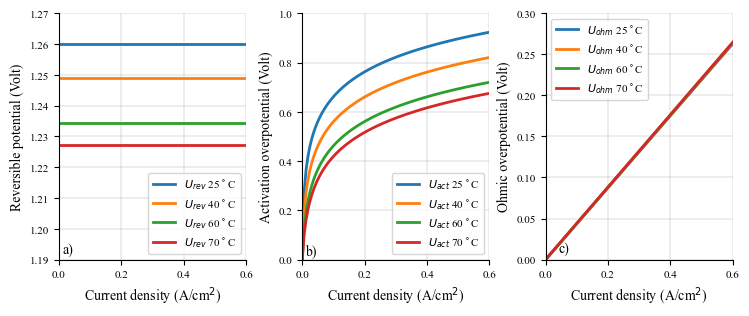

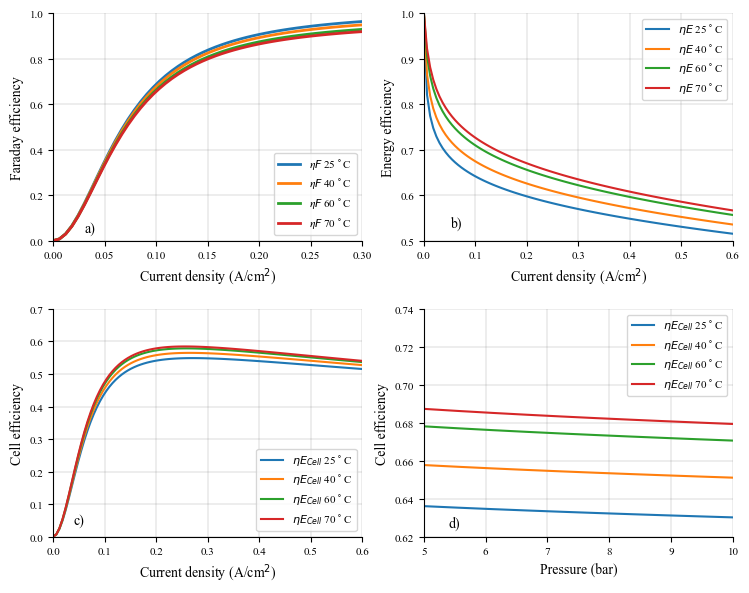

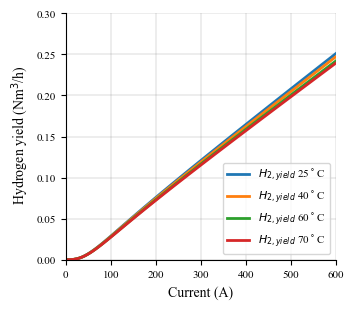

In [ ]:
# Simulation and visualization of cell potentials and efficiencies at varied operational parameters

# Imports and main arrays 
from matplotlib.ticker import MultipleLocator # For plot ticker configuration 
I_list= np.linspace(0,600,100) # List of current values in A
i_list = I_list/A_m2 # Current density in A/m²
i_list_cm2 =  i_list/10000 # Current density in A/cm², used for ploting 
T_list=np.array([25,40,60,80]) # List of operating temperature  
# Storage lists
Ecell_multi = [] # Storage array for cell voltage 
ener_eff =[]  # Storage array for energy effiency 
Erev_run = [] # Array for reversible voltage
Eact_run = [] # Array for activation energy
Eohm_run = [] # Array for ohmic energy
uth_multi2 =[] # Array for thermoneutral voltage
fard_List=[] # Array for faraday efficiency
enerEFF_List=[] # Array for Energy efficiency

# Coefficients for activation overpotential 
s =0.33824 
t1 =-0.01539 
t2 =2.00181
t3 =15.24178
# Coefficients for ohmic overpotential calculation 
r1 = 4.45153*10**-5
r2 =6.88874*10**-9 
d1 =-3.12996*10**-6 
d2 =4.47137*10**-7 

# Main function for computing potentials and some of the cell performance at varied temperatures and current densities 

def cellVoltage (temperatures=T_list,idensities=i_list):
    for temperature in temperatures:
        # Momemtary storages at each current density in the list
        Ecell_list=[]
        Eff_L=[]
        Erev = []
        Eact = []
        Eohm = []
        Uth=[]
        fard_list=[]
        enerEFF=[]
        # Looping through current densities 
        for currentd in idensities:
            p=5 # Pressure 
            T=temperature
            T_K= T+273.15 # Temperature in kelvin 
            Erev_T_1 = (1.5184-(1.5421*10**-3)*T_K)+(9.523*10**-5*T_K*np.log(T_K))+(9.84*10**-8*T_K**2)
            
            R=8.3145
            F=96485
            p_expression = ((3*R*T_K)/(4*F))*math.log(p)
            Erev_T_p = Erev_T_1 + p_expression
            logterm=(t1+(t2/T)+(t3/T**2))
            ActivationOV= s*(np.log10((logterm*(currentd))+1))
            OhmicOV= ((r1 + d1) +(r2*T)  + (d2*p))*currentd
            Ecell= Erev_T_p + ActivationOV + OhmicOV  # Overall cell voltage 
            eff_E =   Erev_T_p/ Ecell  # Energy voltage 
            # thermoneutral voltage at standard conditions using empirical formula 
            Tinitial=25
            T0=Tinitial+273.15  # T initial in kelvin 
            # calculation of vth at varied temperature and 1 bar 
            v_T_1= (1.485-(1.49*10**-4)*(T_K-T0))-(9.84*10**-8*(T_K-T0)**2)
           
            # empirical coefficients for vth accounting for varied pressure 
            c1=-351
            c2=12760
            C= c1 + (c2/T_K**1/2)
            b1=20.5
            b2=-1857
            B=b1+(b2/T_K)
            dB_dT=b2/T_K**2
            c2=12760
            dC_dT= c2/T_K**3/2
            Rpg=8.3145
            F=96485 
            H_T_P =(v_T_1*2*F)+ (B-(T_K*dB_dT))*(p)+ ((C-B**2)-(0.5*T_K*(dC_dT-(2*B*dB_dT))))*(p**2)/(Rpg*T_K)
            v_T_p=H_T_P /(2*F)  # Thermoneutral voltage 

            # Faraday coefficients 
            f11=478645.74
            f12=-2953.15
            f21= 1.03960
            f22=-0.00104
            faraday_eff=(currentd**2/(f11+f12+currentd**2))*(f21+(f22*T))  # Faraday efficiency 
            
            eff=eff_E*faraday_eff  # Overall cell efficiency
            
            # Appending 2d arrays 
            Eff_L.append(eff)
            Ecell_list.append(Ecell)
            Erev.append(Erev_T_p) 
            Eact.append(ActivationOV)
            Eohm.append(OhmicOV)
            Uth.append(v_T_p)
            fard_list.append( faraday_eff)
            enerEFF.append( eff_E)
        # Appending 3d arrays
        Ecell_multi.append(Ecell_list)
        ener_eff.append(Eff_L)
        Erev_run.append(Erev)                   
        Eact_run.append(Eact)
        Eohm_run.append(Eohm)
        uth_multi2.append(Uth)
        fard_List.append(fard_list)
        enerEFF_List.append(enerEFF)

cellVoltage()

# Computing Cell efficiency at varied tempratures and pressures 
p_list= np.linspace(5,10,10) #list of operating pressure 
Eff_multi = [] # Storage array for cell efficiency at varied tempratures and pressures 
# Function
def cellEff (temperatures=T_list,pressures=p_list):

    for temperature in temperatures:
        Eff_list=[]
        for pr in pressures:
            currentd=4000 # Current density
            T=temperature
            T_K= T+273.15

            Erev_T_1 = (1.5184-(1.5421*10**-3)*T_K)+(9.523*10**-5*T_K*np.log(T_K))+(9.84*10**-8*T_K**2)

            R=8.3145
            F=96485
            p_expression = ((3*R*T_K)/(4*F))*math.log(pr)
            Erev_T_p = Erev_T_1 + p_expression
            v_T_1= (1.485-(1.49*10**-4)*(T_K-T0))-(9.84*10**-8*(T_K-T0)**2)
            H_T_P =(v_T_1*2*F)+ (B-(T_K*dB_dT))*(pr)+ ((C-B**2)-(0.5*T_K*(dC_dT-(2*B*dB_dT))))*(pr**2)/(Rpg*T_K)
            v_T_p=H_T_P /(2*F)
            
            logterm=(t1+(t2/T)+(t3/T**2))
            ActivationOV= s*(np.log10((logterm*(currentd))+1))
            
            OhmicOV= ((r1 + d1) +(r2*T)  + (d2*pr))*currentd

            Ecell= Erev_T_p + ActivationOV + OhmicOV
            nE=(v_T_p /Ecell)
             # f coefficients 
            f11=478645.74
            f12=-2953.15
            f21= 1.03960
            f22=-0.00104
            faraday_eff=(currentd**2/(f11+f12+currentd**2))*(f21+(f22*T))
            
            n= (nE* faraday_eff) # Cell efficiency 
            # Appending for each operating pressure 
            Eff_list.append(n)
        # Appending 3d array 
        Eff_multi.append(Eff_list)

cellEff()

# Hydrogen yield simulation 

yield_List=[] # Storage for hydrogen yield 
fard_List=[]  # Storage for faraday efficiency at varying currents and temperatures 
def Yield (temperatures=T_list,Is=I_list):

    for temperature in temperatures:
        yield_list=[]
        fard_list=[]
        for Ix in Is:
            T = temperature
            i = Ix/A_m2
            
            # f coefficients 
            f11=478645.74
            f12=-2953.15
            f21= 1.03960
            f22=-0.00104
            faraday_eff=(i**2/(f11+f12+i**2))*(f21+(f22*T))
            z=2  # electron transfered 
            F=96485 #faraday coefficient 
            H2prod = faraday_eff*(Ix/(z*F)) # Hydrogen yield in mol/s
            H2 = (H2prod*3600)/44.618 # % Hydrogen yield in Nm^3/h
            # Append 2d array
            fard_list.append(faraday_eff)
            yield_list.append(H2)
        # Append 3d array
        yield_List.append(yield_list)
        fard_List.append(fard_list)
Yield()


### plotting  
plt.rcParams["font.family"] = "Times New Roman "

# Figure Potentials vs current density
Fig2,ax1=plt.subplots(figsize=(3.69,3.2))

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('Current density (A/cm$^{2}$)',animated=True,fontsize=10)
ax1.set_ylabel('Potentials (Volt)',fontsize=10)
ax1.set_xlim(0,0.6)
ax1.set_ylim(1,2.8)
ax1.tick_params(axis='both', labelsize=8)  
ax1.grid(color='gray', linewidth=0.2, alpha=1)

i=3
#i=0
ax1.plot(i_list_cm2,Ecell_multi[3],label=f'$U_{{cell}}$ {75}$^\circ$C',linewidth=2,color='C0')
ax1.plot(i_list_cm2,Erev_run[3],label=f'$E_{{rev}}$ {75}$^\circ$C',linewidth=2,linestyle='-.',color='C0')

ax1.plot(i_list_cm2,Ecell_multi[0],label=f'$U_{{cell}}$ {25}$^\circ$C',linewidth=2,color='C2')
# ax1.plot(i_list_cm2,uth_multi2 [0])
ax1.plot(i_list_cm2,Erev_run[0],label=f'$E_{{rev}}$ {25}$^\circ$C',linewidth=2,linestyle='-.',color='C2')
ax1.plot(i_list_cm2,uth_multi2 [3],label=f'$U_{{th}}$ ',linewidth=2,color='C1')

ax1.legend(loc="upper left",prop={'size':8},)
# Saving the image 
# Fig2.savefig("images/uth-Ucell.tiff", format='tiff', dpi=500, bbox_inches='tight',bbox_extra_artists=[ax1.yaxis.label, ax2.yaxis.label],pil_kwargs={"compression": "tiff_lzw"})

# Importing data from extracted from sakas grapgh for validation using panda 
import pandas as pd 
data = pd.read_excel("data\sakas_polarizationCurve_data_validation.xlsx")
current_sak=data['current'].values
cell_pot_sak=data['potebtial'].values
indices = np.linspace(0, len(current_sak) - 1, 15, dtype=int)
current_sak_subset = current_sak[indices]
cell_pot_sak_subset = cell_pot_sak[indices]

# print(cell_pot_sak)

# Visualizing polarization curve and validation using sakas data 

Fig3, (ax1, ax2) =plt.subplots(nrows=1, ncols=2,figsize=(8.770, 3.2 ) )
Fig3.subplots_adjust(wspace=0.2) 
# Plot 1: polarization curve
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('Current density (A/cm$^{2}$)',animated=True, fontsize=10)
ax1.set_ylabel('Cell potentail (Volt)', fontsize=10)
ax1.text(0.02, 1.04, 'a)',fontsize=10,)
ax1.tick_params(axis='both', labelsize=8)  
ax1.set_xlim(0,0.5)
ax1.set_ylim(1,2.6)
ax1.grid(color='gray', linewidth=0.2, alpha=1)

i=2
ax1.plot(i_list_cm2,Ecell_multi[i],label=f'$U_{{cell}}$ {60}$^\circ$C',color='g',linewidth=2)
ax1.legend(loc="upper right",prop={'size':8})

# Plot 2: validation 

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlabel('Current density (A/cm$^{2}$)',animated=True, fontsize=10)
# ax2.set_ylabel('Cell potentail(Volt)', fontsize=10)
ax2.text(0.02, 1.04, 'b)',fontsize=10,)
ax2.tick_params(axis='both', labelsize=8)  
ax2.set_xlim(0,0.5)
ax2.set_ylim(1,2.6)
ax2.grid(color='gray', linewidth=0.2, alpha=1)
ax2.plot(i_list_cm2,Ecell_multi[3],label=f'Model $U_{{cell}}$ {70}$^\circ$C',color='purple',linewidth=2)

ax2.plot(current_sak_subset,cell_pot_sak_subset, 'D', markerfacecolor='none', markeredgecolor='red',label=f'Measured Sakas $U_{{cell}}$ {70}$^\circ$C',markersize=4)
ax2.legend(loc="upper right",prop={'size':8})
# save the figure 
# Fig3.savefig("images/Polarization-curve.tiff", format='tiff', dpi=500, bbox_inches='tight',bbox_extra_artists=[ax1.yaxis.label, ax2.yaxis.label],pil_kwargs={"compression": "tiff_lzw"})

# plot cell potential vs current density 

Fig4,ax1=plt.subplots(figsize=(3.685, 3.2 ))

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('Current density (A/cm$^{2}$)',animated=True, fontsize=10)
ax1.set_ylabel('Cell potential (Volt)', fontsize=10)
ax1.tick_params(axis='both', labelsize=8) 
ax1.set_xlim(0,0.5)
ax1.set_ylim(1,2.6)
ax1.grid(color='gray', linewidth=0.2, alpha=1)
i=0

for tp in T_list:
  ax1.plot(i_list_cm2,Ecell_multi[i],label=f'$U_{{cell}}$ {tp}$^\circ$C',linewidth=2)
  ax1.legend(loc="lower right",prop={'size':8})
  i+=1
# save 
# Fig4.savefig("images/Polarization-multi.tiff", format='tiff', dpi=500, bbox_inches='tight',bbox_extra_artists=[ax1.yaxis.label, ax2.yaxis.label],pil_kwargs={"compression": "tiff_lzw"})

# plot for reversible potential and overpotentials 

Fig6,(ax1,ax2,ax3)=plt.subplots(1, 3,figsize=(8.695, 3.2))

Fig6.subplots_adjust(wspace=0.3)  # spacing 

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', labelsize=8)  
ax1.set_xlabel('Current density (A/cm$^{2}$)',animated=True,fontsize=10)
ax1.set_ylabel('Reversible potential (Volt)',fontsize=10)
ax1.set_xlim(0,0.6)
ax1.set_ylim(1.19,1.27)
ax1.grid(color='gray', linewidth=0.2, alpha=1)
ax1.text(0.01, 1.192, 'a)',fontsize=10,)

ax2.set_xlabel('Current density (A/cm$^{2}$)',animated=True,fontsize=10)
ax2.set_ylabel('Activation overpotential (Volt)',fontsize=10)
ax2.tick_params(axis='both', labelsize=8)  
ax2.set_xlim(0,0.6)
ax2.set_ylim(0,1)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(color='gray', linewidth=0.2, alpha=1)
ax2.text(0.01, 0.02, 'b)',fontsize=10,)


ax3.set_xlabel('Current density (A/cm$^{2}$)',animated=True,fontsize=10)
ax3.set_ylabel('Ohmic overpotential (Volt)',fontsize=10)
ax3.tick_params(axis='both', labelsize=8)  
ax3.set_xlim(0,0.6)
ax3.set_ylim(0,0.3)
ax3.grid(color='gray', linewidth=0.2, alpha=1)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.text(0.04, 0.009, 'c)',fontsize=10,)

# set a plots
i=0
for tp in T_list:
 ax1.plot(i_list_cm2, Erev_run[i],label=f'$U_{{rev}}$ {tp}$^\circ$C',linewidth=2)
 ax1.legend(loc="lower right",prop={'size':8})
 ax2.plot(i_list_cm2,Eact_run[i],label=f'$U_{{act}}$ {tp}$^\circ$C',linewidth=2)
 ax2.legend(loc="lower right",prop={'size':8})
 ax3.plot(i_list_cm2, Eohm_run[i],label=f'$U_{{ohm}}$ {tp}$^\circ$C',linewidth=2)
 ax3.legend(loc="upper left",prop={'size':8})
 i+=1
# save
# Fig6.savefig("images/over-volts.tiff", format='tiff', dpi=500, bbox_inches='tight',bbox_extra_artists=[ax1.yaxis.label, ax2.yaxis.label],pil_kwargs={"compression": "tiff_lzw"})

# plot for efficiencies 

Fig9, ((ax1, ax2), (ax3, ax4))=plt.subplots(2,2,figsize=(8.77, 6.8))
Fig9.subplots_adjust(wspace=0.2, hspace=0.3) 

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.text(0.03, 0.04, 'a)',fontsize=10,)
ax1.set_xlabel('Current density (A/cm$^{2}$)',animated=True,fontsize=10)
ax1.set_ylabel('Faraday efficiency',fontsize=10)
ax1.grid(color='gray', linewidth=0.2, alpha=1)
ax1.tick_params(axis='both', labelsize=8)  
ax1.set_xlim(0,0.30)
ax1.set_ylim(0,1)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.text(0.05, 0.53, 'b)',fontsize=10,)
ax2.set_xlabel('Current density (A/cm$^{2}$)',animated=True,fontsize=10)
ax2.set_ylabel('Energy efficiency',fontsize=10)
ax2.grid(color='gray', linewidth=0.2, alpha=1)
ax2.tick_params(axis='both', labelsize=8)  
ax2.set_xlim(0,0.6)
ax2.set_ylim(0.5,1)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.text(0.04, 0.04, 'c)',fontsize=10,)
ax3.set_xlabel('Current density (A/cm$^{2}$)',animated=True,fontsize=10)
ax3.set_ylabel('Cell efficiency',fontsize=10)
ax3.grid(color='gray', linewidth=0.2, alpha=1)
ax3.tick_params(axis='both', labelsize=8)  
ax3.set_xlim(0,0.6)
ax3.set_ylim(0,0.7)

ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.text(5.4, 0.625, 'd)',fontsize=10,)
ax4.set_xlabel('Pressure (bar)',animated=True,fontsize=10)
ax4.set_ylabel('Cell efficiency',fontsize=10)

ax4.grid(color='gray', linewidth=0.2, alpha=1)
ax4.tick_params(axis='both', labelsize=8)  
ax4.set_xlim(5,10)
ax4.set_ylim(0.62,0.74)

i=0
for tp in T_list:
 
 ax1.plot(i_list_cm2, fard_List[i],label=f'$𝜂F$ {tp}$^\circ$C',linewidth=2)
 ax1.legend(loc="lower right",prop={'size':8})

 ax2.plot(i_list_cm2,  enerEFF_List[i],label=f'$ηE$ {tp}$^\circ$C')
 ax2.legend(loc="upper right",prop={'size':8})

 ax3.plot(i_list_cm2, ener_eff[i],label=f'$ηE_{{Cell}}$ {tp}$^\circ$C')
 ax3.legend(loc="lower right",prop={'size':8})
 
 ax4.plot(p_list,Eff_multi[i],label=f'$ηE_{{Cell}}$ {tp}$^\circ$C')
 ax4.legend(loc="upper right",prop={'size':8})
 i+=1
# Saving image
# Fig9.savefig("images/efficiencies6.tiff", format='tiff', dpi=500, bbox_inches='tight',bbox_extra_artists=[ax1.yaxis.label, ax2.yaxis.label],pil_kwargs={"compression": "tiff_lzw"})

# plot hydrogen yield 

Fig10,ax1=plt.subplots(figsize=(3.485, 3.2))

ax1.set_xlabel('Current (A)',animated=True,fontsize=10)
ax1.set_ylabel(' Hydrogen yield (Nm$^{3}$/h)',fontsize=10)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', labelsize=8)  
ax1.grid(color='gray', linewidth=0.2, alpha=1)
ax1.set_xlim(0,600)
ax1.set_ylim(0,0.3)

i=0
for tp in T_list:
 
 ax1.plot(I_list, yield_List[i],label=f'$H_{{2,yield}}$ {tp}$^\circ$C',linewidth=2)
 i+=1
 ax1.legend(loc="lower right",prop={'size':8})
 #saving image
# Fig10.savefig("images/yield1.tiff", format='tiff', dpi=500, bbox_inches='tight',bbox_extra_artists=[ax1.yaxis.label, ax2.yaxis.label],pil_kwargs={"compression": "tiff_lzw"})

The 2 sections of code below are used for resizing and combining images, and can therefore be disregarded 

In [ ]:
# from PIL import Image ,ImageDraw, ImageFont

# # Define final image size in pixels (at 300 DPI)
# final_width = int(182.5 * 500 / 25.4)  # 1063 pixels
# final_height = int(3.2 * 500)       # 960 pixels

# # Open the two images
# img1 = Image.open("images/weight.png")
# img2 = Image.open("images/bias.png")

# # Resize images to fit half of the final width
# img_width = final_width // 2  # Each image gets half the width
# img_height = final_height

# img1 = img1.resize((img_width, img_height), Image.LANCZOS)
# img2 = img2.resize((img_width, img_height), Image.LANCZOS)

# # Create a blank image with extra space for labels
# padding_x = 150  # Extra space for Y-axis label
# padding_y = 100  # Extra space for X-axis labels
# combined_img = Image.new("RGB", (final_width + padding_x, final_height + padding_y), (255, 255, 255))

# # Paste images side by side
# combined_img.paste(img1, (padding_x, 0))
# combined_img.paste(img2, (padding_x + img_width, 0))

# # Draw text labels
# draw = ImageDraw.Draw(combined_img)

# # Define font (fallback to default if no font file is available)
# try:
#     font = ImageFont.truetype("times.ttf", 70)  # Adjust size as needed
# except IOError:
#     font = ImageFont.load_default()

# # Position for text labels
# x_pos = padding_x + 10  # Left margin for image labels
# y_pos = 10  # Top margin for image labels

# # Add labels "a" and "b"
# draw.text((x_pos, y_pos), "a)", fill="black", font=font)  # Label "a" for first image
# draw.text((img_width + x_pos, y_pos), "b)", fill="black", font=font)  # Label "b" for second image

# # Define axis font
# axis_font_size = 70
# try:
#     axis_font = ImageFont.truetype("times.ttf", axis_font_size)
# except IOError:
#     axis_font = font

# # Y-axis label (Epochs) - Now vertical
# epochs_label = "Epochs"

# # Create a new blank image for rotated text
# text_size = draw.textbbox((0, 0), epochs_label, font=axis_font)  # Get text size
# text_width = text_size[2] - text_size[0]
# text_height = text_size[3] - text_size[1]

# epochs_text_img = Image.new("RGBA", (text_width, text_height), (255, 255, 255, 0))
# epochs_draw = ImageDraw.Draw(epochs_text_img)
# epochs_draw.text((0, 0), epochs_label, fill="black", font=axis_font)

# # Rotate text
# epochs_text_img = epochs_text_img.rotate(90, expand=True)

# # Paste rotated text on the main image
# combined_img.paste(epochs_text_img, (20, final_height // 3), epochs_text_img)

# # X-axis labels
# weight_label = "Weight Distribution"
# bias_label = "Bias Distribution"

# weight_x_pos = padding_x + img_width // 4
# bias_x_pos = padding_x + img_width + img_width // 4
# x_axis_y_pos = final_height + 20  # Position below images

# draw.text((weight_x_pos, x_axis_y_pos), weight_label, fill="black", font=axis_font)
# draw.text((bias_x_pos, x_axis_y_pos), bias_label, fill="black", font=axis_font)

# # Save the final image
# # combined_img.save("images/combined_image2.jpeg", format="JPEG", dpi=(500, 500), quality=90)




C:\Users\arsel\AppData\Local\Temp\ipykernel_22416\1831070849.py:16: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img1 = img1.resize((img_width, img_height), Image.LANCZOS)
C:\Users\arsel\AppData\Local\Temp\ipykernel_22416\1831070849.py:17: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img2 = img2.resize((img_width, img_height), Image.LANCZOS)


In [ ]:
# from PIL import Image

# # Desired final dimensions
# final_width = int(190 * 500 / 25.4)  # 90 mm to pixels at 500 DPI
# final_height = int(3.2 * 500)       # 3.2 inches to pixels at 500 DPI

# # Open the image
# img3 = Image.open("images/network_copy.jpg")

# # Crop the image (remove 7% from both sides)
# width, height = img3.size
# left = width * 0  # Start at 7% of the width
# right = width * 1  # End at 93% of the width
# cropped_image = img3.crop((left, 0, right, height))

# # Resize the cropped image while maintaining aspect ratio
# # Calculate the scaling factor to fit within the final dimensions
# aspect_ratio = cropped_image.width / cropped_image.height
# target_aspect_ratio = final_width / final_height

# if aspect_ratio > target_aspect_ratio:
#     # Image is wider than the target aspect ratio
#     new_width = final_width
#     new_height = int(final_width / aspect_ratio)
# else:
#     # Image is taller than the target aspect ratio
#     new_height = final_height
#     new_width = int(final_height * aspect_ratio)

# # Resize the image
# img_res = cropped_image.resize((new_width, new_height), Image.LANCZOS)

# # Create a blank image with the desired final dimensions
# imag = Image.new("RGB", (final_width, final_height), (255, 255, 255))  # White background

# # Calculate the position to paste the resized image (centered)
# x_offset = (final_width - new_width) // 2
# y_offset = (final_height - new_height) // 2

# # Paste the resized image onto the blank image
# imag.paste(img_res, (x_offset, y_offset))

# # Save the final image
# # imag.save("plotFigures/network_edited.jpg", format="JPEG", dpi=(500, 500), quality=90)

C:\Users\arsel\AppData\Local\Temp\ipykernel_42708\3979262059.py:31: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_res = cropped_image.resize((new_width, new_height), Image.LANCZOS)
